In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Objective:
Train an NLP based **classification model** to detect whether the news is **Real** or **Fake**.

# Loading the Dataset:

In [24]:
df = pd.read_csv("WELFake_Dataset.csv")
df.head(5)

Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA‚ÄôS ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


# Dropping Unnecessary Columns:

In [26]:
df = df.drop(columns=['Unnamed: 0'])

In [27]:
# Drop rows with missing text (only ~39 rows)
df = df.dropna(subset=['text'])

In [28]:
# Fill missing titles with empty string
df['title'] = df['title'].fillna('')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72095 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   72095 non-null  object
 1   text    72095 non-null  object
 2   label   72095 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


# Exploratory Data Analysis:

In [30]:
# Set a clean style
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

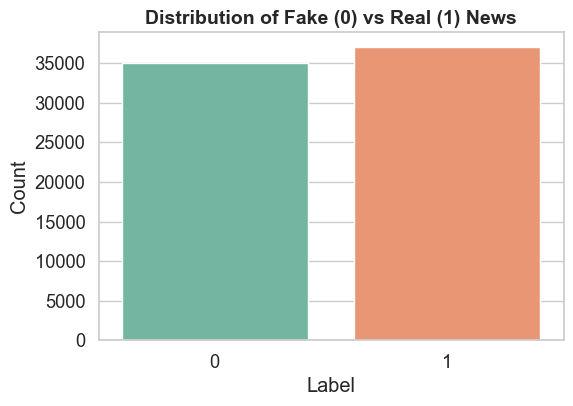

In [31]:
# Label Distribution

plt.figure(figsize=(6,4))
sns.countplot(x=df['label'], palette="Set2", hue = df['label'], legend = False)
plt.title("Distribution of Fake (0) vs Real (1) News", fontsize=14, weight='bold')
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

There is almost **equal** number of both Real and Fake news. So the distribution is almost **Uniform**.

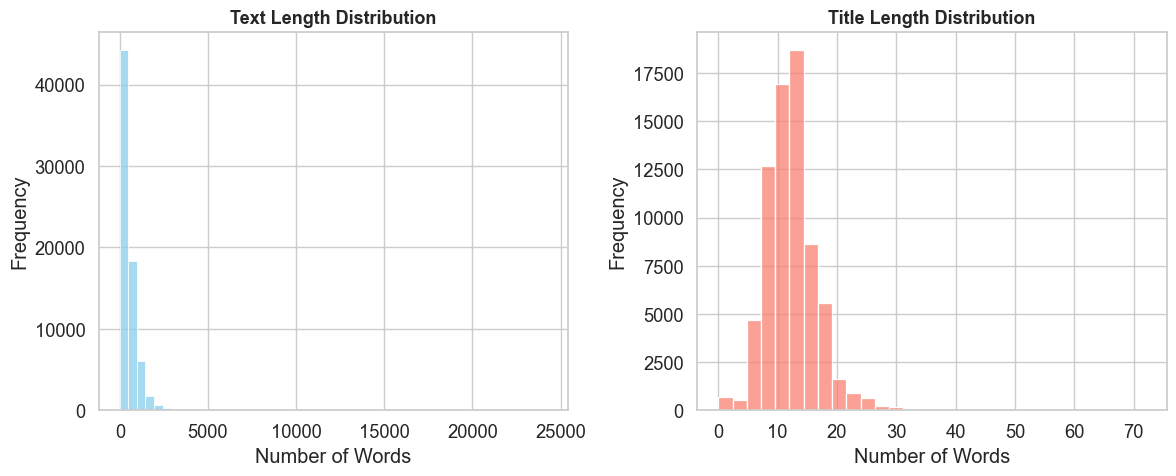

In [10]:
# Text Length Distribution

df['text_len'] = df['text'].apply(lambda x: len(x.split()))
df['title_len'] = df['title'].apply(lambda x: len(x.split()))

fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df['text_len'], bins=50, ax=axes[0], color="skyblue")
axes[0].set_title("Text Length Distribution", fontsize=13, weight='bold')
axes[0].set_xlabel("Number of Words")
axes[0].set_ylabel("Frequency")

sns.histplot(df['title_len'], bins=30, ax=axes[1], color="salmon")
axes[1].set_title("Title Length Distribution", fontsize=13, weight='bold')
axes[1].set_xlabel("Number of Words")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

1. The length of title is ranging from **0-30** words. With most of the titles ranging from **10** to **20** words.
2. The length of text description is ranging from **0-2500** words. Most of them lie in the range **0-1000** words.

In [11]:
from wordcloud import WordCloud

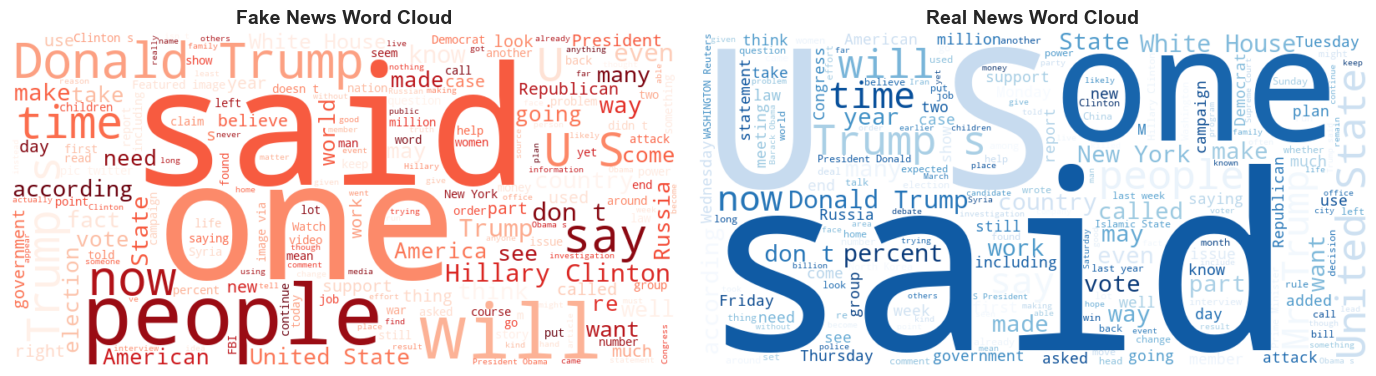

In [12]:
# Word Clouds.

fake_text = " ".join(df[df['label']==1]['text'])
real_text = " ".join(df[df['label']==0]['text'])

wc_fake = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(fake_text)
wc_real = WordCloud(width=800, height=400, background_color="white", colormap="Blues").generate(real_text)

fig, axes = plt.subplots(1, 2, figsize=(14,6))

axes[0].imshow(wc_fake, interpolation="bilinear")
axes[0].set_title("Fake News Word Cloud", fontsize=14, weight='bold')
axes[0].axis("off")

axes[1].imshow(wc_real, interpolation="bilinear")
axes[1].set_title("Real News Word Cloud", fontsize=14, weight='bold')
axes[1].axis("off")

plt.tight_layout()
plt.show()

1. The most used words in the **Fake News WordCloud** are **said, will, people, one, Trumps** etc.
2. The most used words in the **Real News WordCloud** are **US, said, one, people, White House, government** etc.

# Preprocessing the Data:

In [13]:
# Combine title and text into one column
df['content'] = df['title'] + " " + df['text']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72095 entries, 0 to 72133
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      72095 non-null  object
 1   text       72095 non-null  object
 2   label      72095 non-null  int64 
 3   text_len   72095 non-null  int64 
 4   title_len  72095 non-null  int64 
 5   content    72095 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


# Dropping some unnecessary columns and saving for reference:

In [15]:
# Columns to keep for reference
df_ref = df[['title', 'text', 'text_len', 'title_len']].copy()

# Columns for modeling
df_model = df[['content', 'label']].copy()

# Saving the current preprocessed data to Disk:

In [ ]:
# Save training dataframe
df_model.to_parquet("df_model.parquet", index=False)

# Save reference dataframe
df_ref.to_parquet("df_ref.parquet", index=False)

print("‚úÖ DataFrames saved successfully to disk.")

# Reading the current preprocessed data from Disk:

In [ ]:
# Load training dataframe
df_model = pd.read_parquet("df_model.parquet")

# Load reference dataframe
df_ref = pd.read_parquet("df_ref.parquet")

print("‚úÖ DataFrames loaded successfully from disk.")

In [16]:
print("df_model shape:", df_model.shape)
print("df_ref shape:", df_ref.shape)

df_model shape: (72095, 2)
df_ref shape: (72095, 4)


# Train/Test Split:

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# X = features (content), y = target (label)
X = df_model['content']
y = df_model['label']

In [19]:
# Train-test split (80/20) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [20]:
print("‚úÖ Data split completed.")
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

‚úÖ Data split completed.
Train set size: 57676
Test set size: 14419


# Further Preprocessing:

In [21]:
import re
import spacy
import nltk
from nltk.corpus import stopwords

In [22]:
# Download stopwords if not already
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HASHIR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
# Load spaCy model for lemmatization
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

In [24]:
def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()
    
    # 2. Remove punctuation, digits, and extra spaces
    text = re.sub(r'[^a-z\s]', '', text)
    
    # 3. Tokenize + 4. Remove stopwords
    tokens = [word for word in text.split() if word not in stop_words]
    
    # 5. Lemmatization with spaCy
    doc = nlp(" ".join(tokens))
    tokens = [token.lemma_ for token in doc]
    
    return " ".join(tokens)

In [25]:
# Testing
print(preprocess_text("Trump's running quickly in 2020 Elections!!!"))

trump run quickly election


In [26]:
# Apply preprocessing to train and test sets
X_train_clean = X_train.apply(preprocess_text)
X_test_clean = X_test.apply(preprocess_text)

print("‚úÖ Preprocessing complete.")

‚úÖ Preprocessing complete.


# TF-IDF Vectorization:

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(
    max_features=10000,      
    ngram_range=(1,2),       # unigrams + bigrams
    stop_words='english'    
)

In [29]:
# Fit on training data and transform
X_train_tfidf = tfidf.fit_transform(X_train_clean)

In [30]:
# Transform test data
X_test_tfidf = tfidf.transform(X_test_clean)

In [31]:
print("‚úÖ TF-IDF transformation complete.")
print("Train shape:", X_train_tfidf.shape)
print("Test shape:", X_test_tfidf.shape)

‚úÖ TF-IDF transformation complete.
Train shape: (57676, 10000)
Test shape: (14419, 10000)


# Saving Raw Preprocesed Text to Parquet Files:

In [32]:
train_processed = pd.DataFrame({
    "content": X_train_clean,
    "label": y_train.reset_index(drop=True)
})

test_processed = pd.DataFrame({
    "content": X_test_clean,
    "label": y_test.reset_index(drop=True)
})

train_processed.to_parquet("train_processed.parquet", index=False)
test_processed.to_parquet("test_processed.parquet", index=False)

print("‚úÖ Preprocessed train/test text saved.")

‚úÖ Preprocessed train/test text saved.


# Saving TF-IDF Vectorized Data to Disk:

In [6]:
import joblib

In [34]:
joblib.dump(X_train_tfidf, "X_train_tfidf.pkl")
joblib.dump(X_test_tfidf, "X_test_tfidf.pkl")
joblib.dump(y_train, "y_train.pkl")
joblib.dump(y_test, "y_test.pkl")

# Save the fitted TF-IDF vectorizer so you can transform new text later
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

print("‚úÖ TF-IDF features and vectorizer saved.")

‚úÖ TF-IDF features and vectorizer saved.


# Reading Raw Preprocesed Text from Parquet Files:

In [35]:
# Reload preprocessed text
train_processed = pd.read_parquet("train_processed.parquet")
test_processed = pd.read_parquet("test_processed.parquet")

X_train_clean, y_train = train_processed["content"], train_processed["label"]
X_test_clean, y_test = test_processed["content"], test_processed["label"]

# Reading TF-IDF Vectorized Data from Disk:

In [7]:
# Reload TF-IDF features
X_train_tfidf = joblib.load("X_train_tfidf.pkl")
X_test_tfidf = joblib.load("X_test_tfidf.pkl")
y_train = joblib.load("y_train.pkl")
y_test = joblib.load("y_test.pkl")
tfidf = joblib.load("tfidf_vectorizer.pkl")

print("‚úÖ Data and TF-IDF vectorizer loaded successfully.")

‚úÖ Data and TF-IDF vectorizer loaded successfully.


# Training a Logistic Regression Model:

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

In [9]:
# Range of regularization strengths to test
C_values = [0.01, 0.1, 1, 10, 100]
train_accs = []
cv_accs = []

# Stratified K-Fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [10]:
for C in C_values:
    print(f"\nüîπ Training Logistic Regression with C={C}...")
    
    # Logistic Regression model
    log_reg = LogisticRegression(C=C, max_iter=1000, solver="lbfgs", n_jobs=-1)
    
    # Train accuracy
    log_reg.fit(X_train_tfidf, y_train)
    y_train_pred = log_reg.predict(X_train_tfidf)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accs.append(train_acc)
    print(f"   ‚úÖ Train Accuracy: {train_acc:.4f}")
    
    # Cross-validation accuracy
    cv_scores = cross_val_score(log_reg, X_train_tfidf, y_train, cv=cv, scoring="accuracy", n_jobs=-1)
    cv_acc = np.mean(cv_scores)
    cv_accs.append(cv_acc)
    print(f"   ‚úÖ CV Accuracy (5-fold mean): {cv_acc:.4f}")


üîπ Training Logistic Regression with C=0.01...
   ‚úÖ Train Accuracy: 0.8819
   ‚úÖ CV Accuracy (5-fold mean): 0.8764

üîπ Training Logistic Regression with C=0.1...
   ‚úÖ Train Accuracy: 0.9239
   ‚úÖ CV Accuracy (5-fold mean): 0.9144

üîπ Training Logistic Regression with C=1...
   ‚úÖ Train Accuracy: 0.9587
   ‚úÖ CV Accuracy (5-fold mean): 0.9452

üîπ Training Logistic Regression with C=10...
   ‚úÖ Train Accuracy: 0.9822
   ‚úÖ CV Accuracy (5-fold mean): 0.9562

üîπ Training Logistic Regression with C=100...
   ‚úÖ Train Accuracy: 0.9943
   ‚úÖ CV Accuracy (5-fold mean): 0.9549


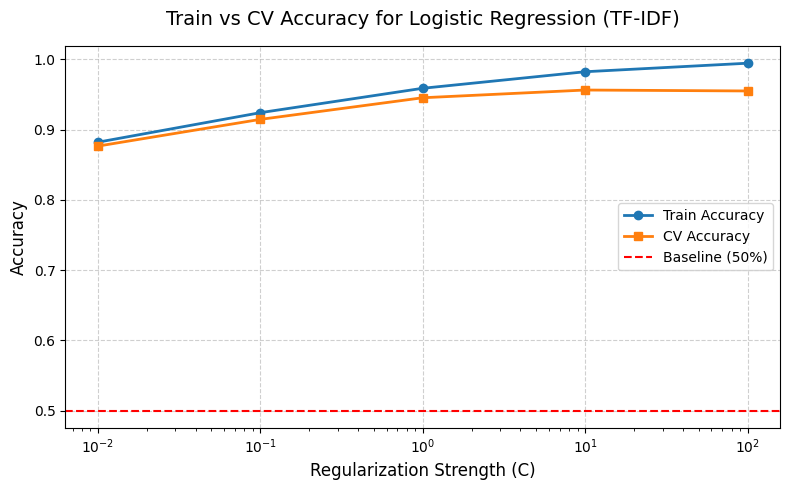

In [11]:
# Baseline (majority class classifier ~ 50%)
baseline_acc = 0.5  

plt.figure(figsize=(8,5))

# Train vs CV accuracy
plt.semilogx(C_values, train_accs, marker='o', label="Train Accuracy", linewidth=2)
plt.semilogx(C_values, cv_accs, marker='s', label="CV Accuracy", linewidth=2)

# Baseline line
plt.axhline(y=baseline_acc, color='red', linestyle='--', linewidth=1.5, label="Baseline (50%)")

# Labels & aesthetics
plt.xlabel("Regularization Strength (C)", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Train vs CV Accuracy for Logistic Regression (TF-IDF)", fontsize=14, pad=15)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# Keeping the best Model:

In [12]:
# Final Logistic Regression model with best C
best_C = 1
final_model = LogisticRegression(C=best_C, max_iter=1000, solver="saga", n_jobs=-1)

print(f"\n Training final Logistic Regression model with C={best_C} on full training set...")
final_model.fit(X_train_tfidf, y_train)

print("‚úÖ Model training complete. Ready for test set evaluation.")


 Training final Logistic Regression model with C=1 on full training set...
‚úÖ Model training complete. Ready for test set evaluation.


# Evaluating the Logistic Regression Model:

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [14]:
# Predictions
y_pred = final_model.predict(X_test_tfidf)

# Accuracy
test_acc = accuracy_score(y_test, y_pred)
print(f"‚úÖ Test Accuracy: {test_acc:.4f}")

‚úÖ Test Accuracy: 0.9463


# Evaluation Metrics and Final Results:

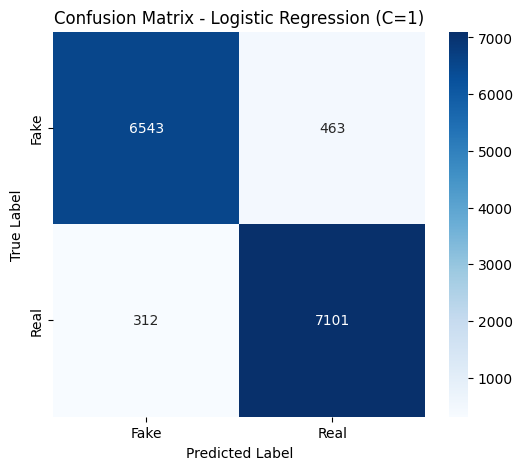

In [15]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression (C=1)")
plt.show()

# In the Diagram below, the Real and Fake is Flipped.

In [17]:
# Precision, Recall, F1 
print("\nüìä Classification Report (Precision, Recall, F1):")
print(classification_report(y_test, y_pred, target_names=["Fake", "Real"]))


üìä Classification Report (Precision, Recall, F1):
              precision    recall  f1-score   support

        Fake       0.95      0.93      0.94      7006
        Real       0.94      0.96      0.95      7413

    accuracy                           0.95     14419
   macro avg       0.95      0.95      0.95     14419
weighted avg       0.95      0.95      0.95     14419



In [46]:
# Ensure both are numpy arrays
y_test_array = y_test.values  

# Misclassification indices
misclassified_idx = np.where(y_test_array != y_pred)[0]

print(f"\n‚ö†Ô∏è Total Misclassifications: {len(misclassified_idx)}")

# Show a few misclassified examples
for i in misclassified_idx[:5]:  # first 5 mistakes
    print("\n--- Misclassified Example ---")
    print(f"True Label: {y_test_array[i]} | Predicted: {y_pred[i]}")
    print(f"Content: {X_test.iloc[i][:300]}...")  # preview first 300 chars


‚ö†Ô∏è Total Misclassifications: 774

--- Misclassified Example ---
True Label: 0 | Predicted: 1
Content: ACLU Launches Nationwide Training on Protest, Resistance Against Trump CORAL GABLES, Fla. (AP)  ‚Äî   The American Civil Liberties Union staged a nationwide training event Saturday to make sure people are aware of their rights as protesters and urge organized, public resistance by those opposed to pol...

--- Misclassified Example ---
True Label: 1 | Predicted: 0
Content:  Trump Just Literally Gave The WWE A Cabinet Position; World Doomed (DETAILS) Just when you thought things couldn t get crazier and more bizarre in the future Donald Trump administration, the president-elect just nominated ex-WWE CEO Linda McMahon to head the Small Business Administration, which is ...

--- Misclassified Example ---
True Label: 0 | Predicted: 1
Content: Illinois House Passes Automatic Voter Registration Bill The Illinois House passed a bill allowing the state to register eligible voters automatic

# Plotting Conclusions:

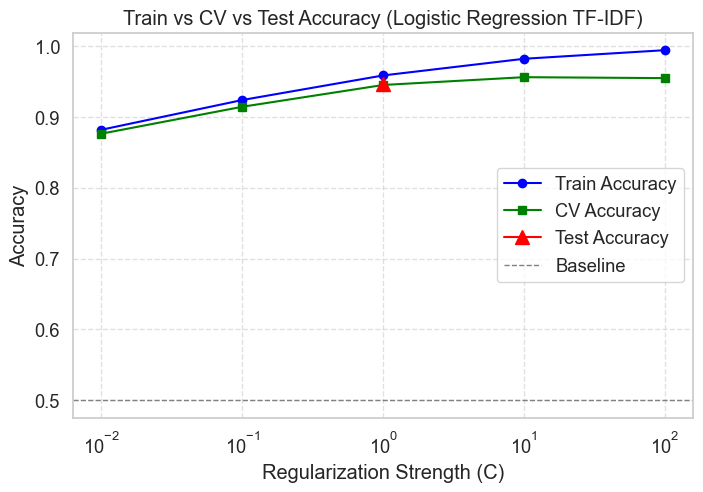

In [49]:
test_accs = [None, None, test_acc, None, None]  # plot only at C=1

# Plot
plt.figure(figsize=(8,5))
plt.semilogx(C_values, train_accs, marker='o', label="Train Accuracy", color="blue")
plt.semilogx(C_values, cv_accs, marker='s', label="CV Accuracy", color="green")
plt.semilogx(C_values, test_accs, marker='^', markersize=10, label="Test Accuracy", color="red")

# Baseline (random guessing ~50%)
plt.axhline(y=0.5, color="gray", linestyle="--", linewidth=1, label="Baseline")

# Labels & Style
plt.xlabel("Regularization Strength (C)")
plt.ylabel("Accuracy")
plt.title("Train vs CV vs Test Accuracy (Logistic Regression TF-IDF)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Saving The Logistic Regression Model:

In [50]:
# Save model
joblib.dump(final_model, "logreg_tfidf_model.pkl")

['logreg_tfidf_model.pkl']

# Loading The Logistic Regression Model:

In [16]:
# Load model 
logistic_regression_model = joblib.load("logreg_tfidf_model.pkl")

# Training a Multinomial Naive Bayes Model:

In [5]:
from sklearn.naive_bayes import MultinomialNB

In [6]:
# Hyperparameter combinations to try
alpha_values = [0.01, 0.1, 0.5, 1.0]
fit_prior_options = [True, False]

# To store results
results = []

In [7]:
for alpha in alpha_values:
    for fit_prior in fit_prior_options:
        # Initialize model
        nb = MultinomialNB(alpha=alpha, fit_prior=fit_prior)
        
        # Training accuracy
        nb.fit(X_train_tfidf, y_train)
        train_acc = nb.score(X_train_tfidf, y_train)
        
        # 5-fold cross-validation accuracy
        cv_acc = cross_val_score(nb, X_train_tfidf, y_train, cv=5, scoring='accuracy').mean()
        
        # Store results
        results.append({
            'alpha': alpha,
            'fit_prior': fit_prior,
            'train_acc': train_acc,
            'cv_acc': cv_acc
        })

In [8]:
# Separate values for plotting
alphas = [r['alpha'] for r in results]
fit_priors = [r['fit_prior'] for r in results]
train_accs = [r['train_acc'] for r in results]
cv_accs = [r['cv_acc'] for r in results]
labels = [f"alpha={r['alpha']}, prior={r['fit_prior']}" for r in results]

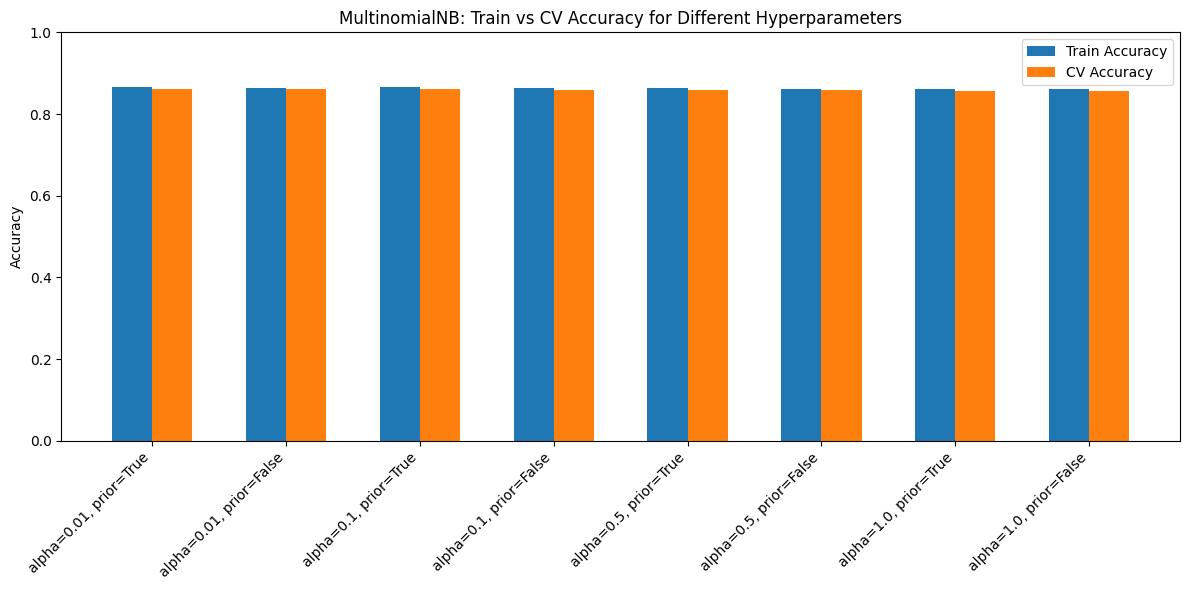

In [9]:
x = np.arange(len(labels))

plt.figure(figsize=(12,6))
plt.bar(x - 0.15, train_accs, width=0.3, label='Train Accuracy')
plt.bar(x + 0.15, cv_accs, width=0.3, label='CV Accuracy')
plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('MultinomialNB: Train vs CV Accuracy for Different Hyperparameters')
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

# Picking the best Model:

In [10]:
best_alpha = 0.01
best_fit_prior = True

# Initialize model
best_nb = MultinomialNB(alpha=best_alpha, fit_prior=best_fit_prior)

In [11]:
best_nb.fit(X_train_tfidf, y_train)

# Training accuracy
train_acc = best_nb.score(X_train_tfidf, y_train)

# 5-fold cross-validation accuracy
cv_acc = cross_val_score(best_nb, X_train_tfidf, y_train, cv=5, scoring='accuracy').mean()

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Cross-Validation Accuracy: {cv_acc:.4f}")

Training Accuracy: 0.8664
Cross-Validation Accuracy: 0.8625


# Evaluating this model on test set:

In [12]:
# predictions
y_test_pred = best_nb.predict(X_test_tfidf)

# Test accuracy
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.8612


# Plotting Different Error Metrics:

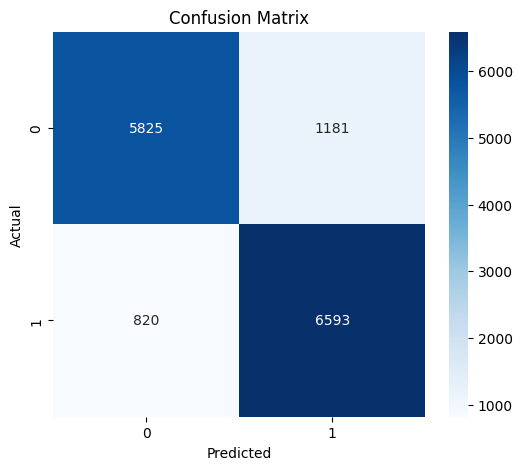

In [15]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [16]:
# Precision, Recall, F1-score
report = classification_report(y_test, y_test_pred)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      7006
           1       0.85      0.89      0.87      7413

    accuracy                           0.86     14419
   macro avg       0.86      0.86      0.86     14419
weighted avg       0.86      0.86      0.86     14419



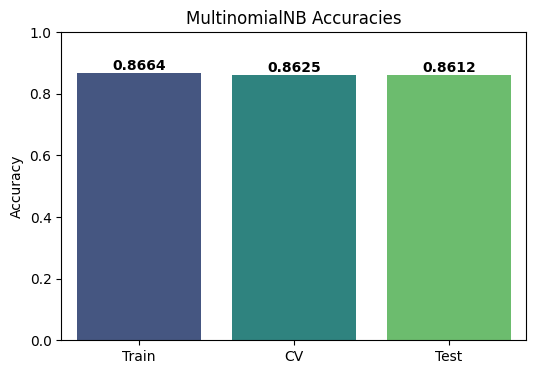

In [18]:
# Accuracies
accuracies = [train_acc, cv_acc, test_acc]
labels = ['Train', 'CV', 'Test']

plt.figure(figsize=(6,4))
sns.barplot(x=labels, y=accuracies, palette="viridis", hue = labels, legend = False)
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("MultinomialNB Accuracies")
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontweight='bold')
plt.show()

# Saving the Multinomial Naive Bayes Model:

In [19]:
# Save the model to a file
model_filename = "multinomial_nb_model.pkl"
joblib.dump(best_nb, model_filename)

print(f"Model saved as {model_filename}")

Model saved as multinomial_nb_model.pkl


# Loaing The Multinomial Naive Bayes Model:

In [17]:
multinomial_nb_model = joblib.load("multinomial_nb_model.pkl")

# Training Random Forest Classifier:

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

In [6]:
param_dist = {
    'n_estimators': [100, 200, 300],          # number of trees
    'max_depth': [20, 30, None],             # limit depth to save memory
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']         
}

In [7]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1) 

In [8]:
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,              # try 20 random combinations
    cv=3,                   # 3-fold CV
    scoring='accuracy',
    verbose=1,
    random_state=42,
    n_jobs=-1               
)

In [9]:
rf_random_search.fit(X_train_tfidf, y_train)

# Best hyperparameters
print("Best Hyperparameters:", rf_random_search.best_params_)

# Training accuracy
best_rf = rf_random_search.best_estimator_
train_acc = best_rf.score(X_train_tfidf, y_train)

# Cross-validation accuracy 
cv_acc = cross_val_score(best_rf, X_train_tfidf, y_train, cv=3, scoring='accuracy').mean()

print(f"Train Accuracy: {train_acc:.4f}")
print(f"CV Accuracy: {cv_acc:.4f}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Train Accuracy: 1.0000
CV Accuracy: 0.9497


# Evaluating the Model on Test Set:

In [10]:
y_pred = best_rf.predict(X_test_tfidf)

test_acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.9544


# Evaluation Metrics:

In [11]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     0.9669    0.9382    0.9523      7006
           1     0.9432    0.9696    0.9562      7413

    accuracy                         0.9544     14419
   macro avg     0.9550    0.9539    0.9543     14419
weighted avg     0.9547    0.9544    0.9543     14419



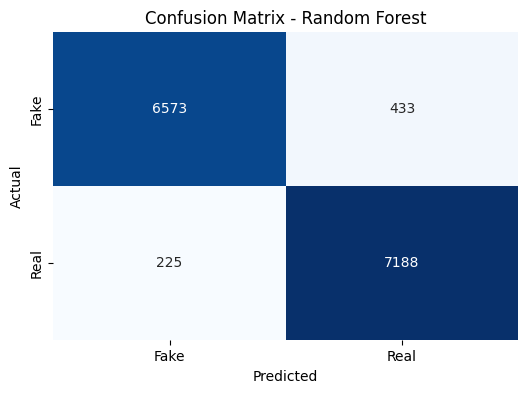

In [12]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

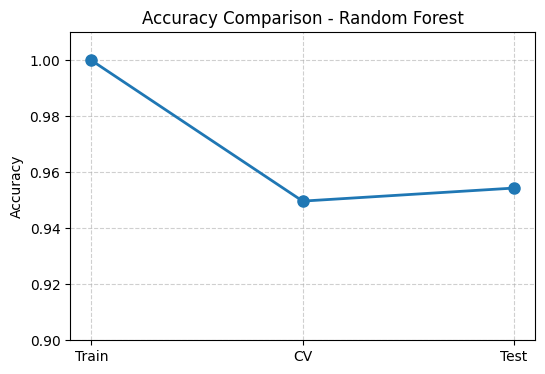

In [13]:
plt.figure(figsize=(6,4))
plt.plot(["Train", "CV", "Test"], [train_acc, cv_acc, test_acc],
         marker="o", linestyle="-", linewidth=2, markersize=8)
plt.title("Accuracy Comparison - Random Forest")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.01)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Saving the Random Forest Model:

In [14]:
joblib.dump(best_rf, "random_forest_model.pkl")

print("Model saved as random_forest_model.pkl")

Model saved as random_forest_model.pkl


# Loading the Random Forest Model:

In [15]:
random_forest_model = joblib.load("random_forest_model.pkl")

# Comparing all 3 Models:

In [18]:
lr_model = joblib.load("logreg_tfidf_model.pkl")
nb_model = joblib.load("multinomial_nb_model.pkl")
rf_model = joblib.load("random_forest_model.pkl")

In [19]:
models = {
    "Logistic Regression (LR)": lr_model,
    "Naive Bayes (NB)": nb_model,
    "Random Forest (RF)": rf_model
}

results = {}

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for name, model in models.items():
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    results[name] = [acc, prec, rec, f1]

In [22]:
df_results = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-score"])
print("\nModel Comparison:\n")
print(df_results)


Model Comparison:

           Logistic Regression (LR)  Naive Bayes (NB)  Random Forest (RF)
Accuracy                   0.946321          0.861225            0.954366
Precision                  0.946483          0.861939            0.954708
Recall                     0.946321          0.861225            0.954366
F1-score                   0.946299          0.861039            0.954338


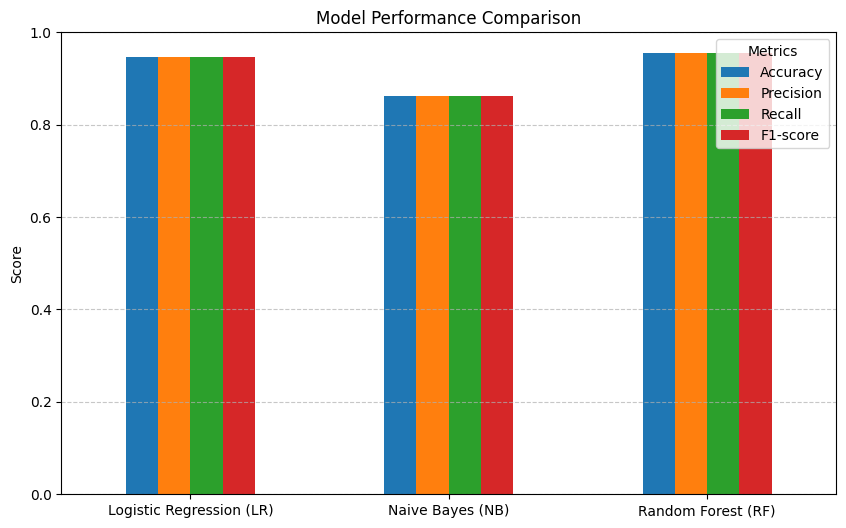

In [23]:
df_results.T.plot(kind="bar", figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

We will choose the **Random Forest Classifier** as our final model.